In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
HouseDF = pd.read_csv("/content/sample_data/USA_Housing.csv")

In [ ]:
HouseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
HouseDF.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<ipython-input-8-72089517bde6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HouseDF.corr(), annot=True)


<Axes: >

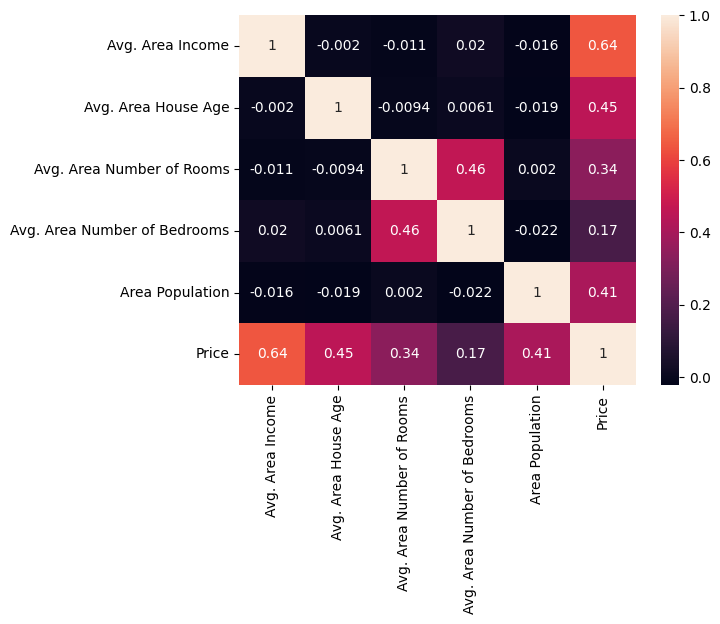

In [ ]:
sns.heatmap(HouseDF.corr(), annot=True)

In [ ]:
min_thresold, max_thresold = HouseDF['Area Population'].quantile([0.001, 0.999])
min_thresold_1, max_thresold_1 = HouseDF['Avg. Area Income'].quantile([0.001, 0.999])
min_thresold_2, max_thresold_2 = HouseDF['Avg. Area House Age'].quantile([0.001, 0.999])
min_thresold_3, max_thresold_3 = HouseDF['Avg. Area Number of Rooms'].quantile([0.001, 0.999])
min_thresold_4, max_thresold_4 = HouseDF['Avg. Area Number of Bedrooms'].quantile([0.001, 0.999])

In [ ]:
HouseDF = HouseDF[(HouseDF['Area Population']<max_thresold) & (HouseDF['Area Population']>min_thresold)]
HouseDF = HouseDF[(HouseDF['Avg. Area Income']<max_thresold_1) & (HouseDF['Avg. Area Income']>min_thresold_1)]
HouseDF = HouseDF[(HouseDF['Avg. Area House Age']<max_thresold_2) & (HouseDF['Avg. Area House Age']>min_thresold_2)]
HouseDF = HouseDF[(HouseDF['Avg. Area Number of Rooms']<max_thresold_3) & (HouseDF['Avg. Area Number of Rooms']>min_thresold_3)]
HouseDF = HouseDF[(HouseDF['Avg. Area Number of Bedrooms']<max_thresold_4) & (HouseDF['Avg. Area Number of Bedrooms']>min_thresold_4)]

HouseDF.shape

(4926, 7)

In [ ]:
HouseDF.reset_index(drop=True, inplace=True)

In [ ]:
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = HouseDF['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=101)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
HouseDF.corr()

<ipython-input-48-668adc5cbc16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  HouseDF.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.005696,-0.013638,0.019117,-0.011222,0.639839
Avg. Area House Age,-0.005696,1.000000,-0.008642,0.012466,-0.018815,0.450834
Avg. Area Number of Rooms,-0.013638,-0.008642,1.000000,0.463580,0.003855,0.334259
Avg. Area Number of Bedrooms,0.019117,0.012466,0.463580,1.000000,-0.018446,0.175500
Area Population,-0.011222,-0.018815,0.003855,-0.018446,1.000000,0.409623
Price,0.639839,0.450834,0.334259,0.175500,0.409623,1.000000


In [ ]:
HouseDF.shape

(4926, 7)

In [ ]:
corr_features = correlation(X_train, 0.7)

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
HouseDF.shape

(4926, 7)

In [ ]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1989,71336.780276,7.500352,5.157097,4.19,58926.225484
196,67371.420857,5.333821,6.624951,4.37,24797.764759
1114,93303.683849,4.720581,7.793746,3.42,38162.612946
4652,75876.933845,4.365121,6.303024,4.20,36119.102355
2721,75012.341660,6.742828,6.604335,4.10,42877.424147
...,...,...,...,...,...
4079,66866.496601,6.471432,7.327363,5.09,32428.477495
4171,56315.351575,5.064975,8.708239,3.46,40985.477196
599,66697.531343,6.532591,6.014092,3.12,25896.990895
1361,57714.752535,4.964760,7.798048,5.40,53100.998908


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 83299.84284502397
R2 Score 0.9144577422803002


In [ ]:
HouseDF

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4921,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4922,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4923,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4924,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
row_index=int(input("Enter row number"))

Enter row number50


In [ ]:
row_index = int(input("Enter row number"))
selected_row = X_test.iloc[row_index, :].values
row_features = selected_row.reshape(1, -1)

predicted_price = linreg.predict(row_features)

Enter row number50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predicted_price[0]

733414.5243317541

In [ ]:
HouseDF.iloc[row_index]

Avg. Area Income                                            49408.19834
Avg. Area House Age                                             5.82592
Avg. Area Number of Rooms                                      5.831739
Avg. Area Number of Bedrooms                                       3.32
Area Population                                            26881.130598
Price                                                      549976.14556
Address                         7796 Joseph Burg\nDanielsside, RI 70370
Name: 50, dtype: object

In [ ]:
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

k_folds = 10

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

mae_scores = cross_val_score(linreg, X_train, y_train, cv=kf, scoring=mae_scorer)
r2_scores = cross_val_score(linreg, X_train, y_train, cv=kf, scoring=r2_scorer)

mean_mae = mae_scores.mean()
mean_r2 = r2_scores.mean()

print(f"Mean MAE: {mean_mae}")
print(f"Mean R2 Score: {mean_r2}")


Mean MAE: 80298.6180104759
Mean R2 Score: 0.9167778633709196


In [ ]:
import pickle
pickle.dump(linreg, open('./model-2.sav', 'wb'))


In [ ]:
with open('X_train.sav', 'wb') as f:
 pickle.dump(X_train, f)
 f.close()

In [ ]:
with open('Y_train.sav', 'wb') as f:
 pickle.dump(y_train, f)
 f.close()